In [110]:
import unicodedata

def limpiar_texto(texto):
    texto = texto.lower()
    # Eliminando tildes
    texto = unicodedata.normalize('NFC', texto)
    permitidos = set('abcdefghijklmnñopqrstuvwxyz')
    texto_limpio = ''.join(c for c in texto if c in permitidos)
    return texto_limpio


def distribucion_caracteres(texto_cifrado):
    # Inicializando un diccionario para almacenar las frecuencias de los caracteres
    frecuencias = {chr(i): 0 for i in range(ord('a'), ord('z')+1)}
    frecuencias['ñ'] = 0
    
    # Calculando las frecuencias de los caracteres en el texto cifrado
    for char in texto_cifrado:
        if char.isalpha() or char == 'ñ':
            frecuencias[char] += 1
    
    # Calculando el total de caracteres
    total_caracteres = sum(frecuencias.values())
    
    # Calculando las probabilidades
    probabilidades = {char: freq / total_caracteres for char, freq in frecuencias.items()}
    
    return probabilidades

# Cifrado César

#####################################
#               Cifrado             #
#                César              #
#####################################
Cifrado César: 
krodfprhvwv
Descifrado César: 
holacmoests


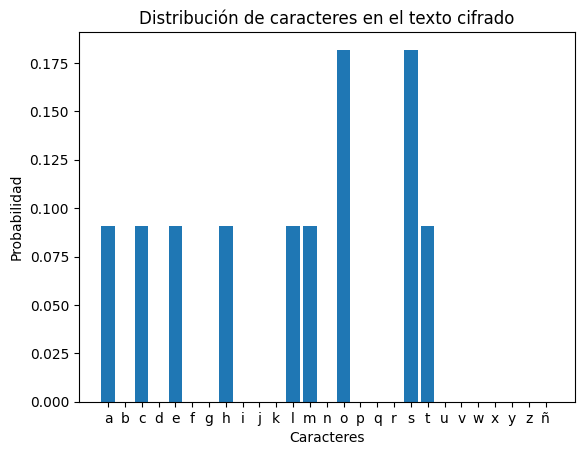

In [111]:
import matplotlib.pyplot as plt

#####################################
#               Cifrado             #
#                César              #
#####################################

# Cifrado César.
def cifrado_caesar(texto, desplazamiento):
    texto = limpiar_texto(texto)
    resultado = ""
    for i in range(len(texto)):
        char = texto[i]
        if char.isalpha():
            ascii_offset = ord('a') if char.islower() else ord('A')
            resultado += chr((ord(char) - ascii_offset + desplazamiento) % 27 + ascii_offset)
        else:
            resultado += char
    return resultado

def descifrado_caesar(texto, desplazamiento):
    return cifrado_caesar(texto, -desplazamiento)


print("#####################################")
print("#               Cifrado             #")
print("#                César              #")
print("#####################################")

ejemplo = "Hola, ¿cómo estás?"
desplazamiento = 3

limpio = limpiar_texto(ejemplo)
cifrado_c = cifrado_caesar(limpio, desplazamiento)

print("Cifrado César: ")
print(cifrado_c)

descifrado_c = descifrado_caesar(cifrado_c, desplazamiento)
print("Descifrado César: ")
print(descifrado_c)

probabilidades_c = distribucion_caracteres(descifrado_c)


plt.bar(probabilidades_c.keys(), probabilidades_c.values())
plt.xlabel('Caracteres')
plt.ylabel('Probabilidad')
plt.title('Distribución de caracteres en el texto cifrado')
plt.show()

# Cifrado Afín

#####################################
#               Cifrado             #
#                Afín               #
#####################################
oblarwijismvcwylmigi
megustalacriptografa


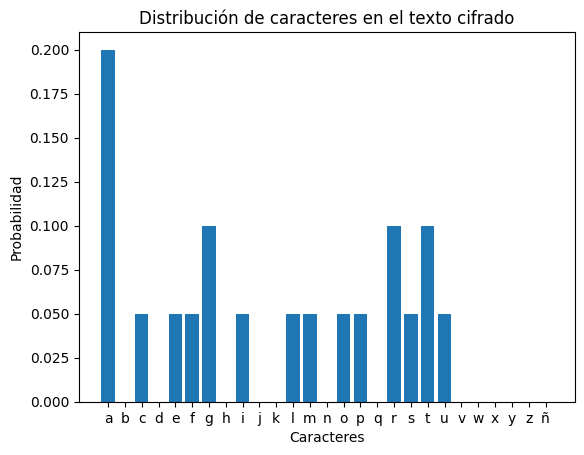

In [118]:
import matplotlib.pyplot as plt

#####################################
#               Cifrado             #
#                Afín               #
#####################################
def cifrado_afin(texto, a, b):
    texto = limpiar_texto(texto)
    resultado = ""
    for char in texto:
        if char.isalpha():
            ascii_offset = ord('a') if char.islower() else ord('A')
            resultado += chr((a * (ord(char) - ascii_offset) + b) % 27 + ascii_offset)
        else:
            resultado += char
    return resultado

def descifrado_afin(texto, a, b):
    a_inv = pow(a, -1, 27)
    return cifrado_afin(texto, a_inv, -a_inv * b)

print("#####################################")
print("#               Cifrado             #")
print("#                Afín               #")
print("#####################################")

texto = "Me gusta la criptografía"
a = 5
b = 8

limpio = limpiar_texto(texto)

texto_cifrado_a = cifrado_afin(limpio, a, b)
print(texto_cifrado_a)

texto_descifrado_a = descifrado_afin(texto_cifrado_a, a, b)
print(texto_descifrado_a)

probabilidades_a = distribucion_caracteres(texto_descifrado_a)


plt.bar(probabilidades_a.keys(), probabilidades_a.values())
plt.xlabel('Caracteres')
plt.ylabel('Probabilidad')
plt.title('Distribución de caracteres en el texto cifrado')
plt.show()

# Cifrado Vigenère

#####################################
#               Cifrado             #
#               Vigenère            #
#####################################
Texto cifrado: 
eljvhglzxet
Texto descifrado: 
cajadeazcar


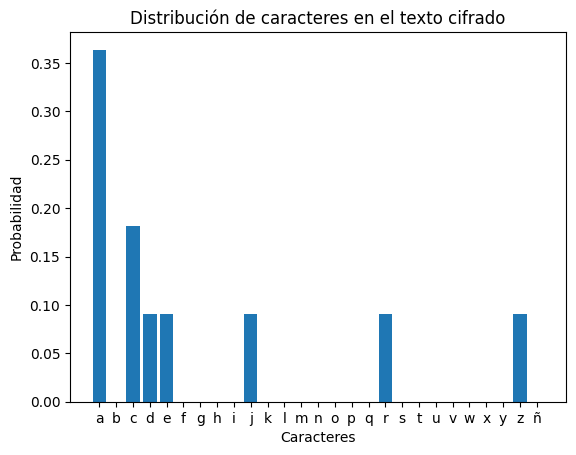

In [113]:
import matplotlib.pyplot as plt

#####################################
#               Cifrado             #
#              Vigenère             #
#####################################


def cifrado_vigenere(texto, clave):
    texto = limpiar_texto(texto)
    resultado = ""
    index_clave = 0
    for char in texto:
        if char.isalpha():
            ascii_offset = ord('a') if char.islower() else ord('A')
            desplazamiento = ord(clave[index_clave % len(clave)]) - ascii_offset
            resultado += chr((ord(char) - ascii_offset + desplazamiento) % 27 + ascii_offset)
            index_clave += 1
        else:
            resultado += char
    return resultado

def descifrado_vigenere(texto, clave):
    clave = clave.lower()
    clave = ''.join(chr((27 - (ord(c) - ord('a'))) % 27 + ord('a')) for c in clave)
    return cifrado_vigenere(texto, clave)

print("#####################################")
print("#               Cifrado             #")
print("#               Vigenère            #")
print("#####################################")

texto = "Caña de azúcar"
clave = "clave"

limpio = limpiar_texto(texto)

texto_cifrado_V = cifrado_vigenere(limpio, clave)
print("Texto cifrado: ")
print(texto_cifrado_V)

texto_descifrado_v = descifrado_vigenere(texto_cifrado_V, clave)
print("Texto descifrado: ")
print(texto_descifrado_v)

probabilidades_v = distribucion_caracteres(texto_descifrado_v)

plt.bar(probabilidades_v.keys(), probabilidades_v.values())
plt.xlabel('Caracteres')
plt.ylabel('Probabilidad')
plt.title('Distribución de caracteres en el texto cifrado')
plt.show()